In [1]:
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/yanhuan/anaconda/pkgs/seaborn-0.7.1-py27_0/lib/python2.7/site-packages')
import seaborn as sns
import numpy as np
import pandas as pd


data_train=pd.read_csv('train.csv')
target_data=data_train['y']
data_train=data_train.drop('y', axis = 1)


data_test=pd.read_csv('test.csv')
combine=[data_train,data_test]
train = pd.concat(combine)

In [2]:
data_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8418 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 24.3+ MB


In [7]:
data_test.describe(include=['O'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [8]:
data_train.describe(include=['O'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [9]:
data_train.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#missing data
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
X385,0,0.0
X132,0,0.0
X123,0,0.0
X124,0,0.0
X125,0,0.0
X126,0,0.0
X127,0,0.0
X128,0,0.0
X129,0,0.0
X130,0,0.0


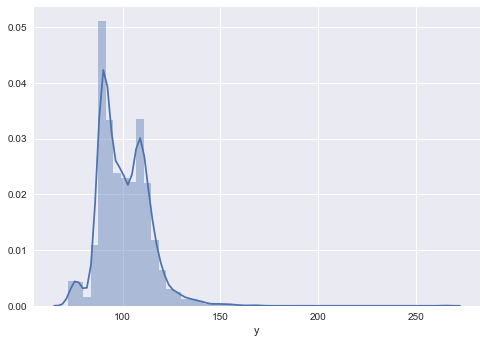

Skewness: 1.206526
Kurtosis: 7.910713


In [11]:
#visulize target data
sns.distplot(target_data);
plt.show()
# looks skew ,need aplly log
#skewness and kurtosis
print("Skewness: %f" % target_data.skew())
print("Kurtosis: %f" % target_data.kurt())

In [12]:
#Target_data is skewed,usinglog to nomalize it
target_data=np.log(target_data)

# Wrangle Data

In [13]:
raw_data=train.drop('ID', axis = 1)

Converting a categorical feature-using one-hot encode

In [14]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
import pandas as pd
raw_data = pd.get_dummies(raw_data)

In [15]:
raw_data.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shuffle and Split Data

In [16]:
from sklearn.cross_validation import train_test_split
feature_train_all=raw_data[:4209]
feature_test=raw_data[4209:]
X_train, X_test, y_train, y_test = train_test_split(feature_train_all,target_data, test_size = 0.2, random_state = 0)


/Users/yanhuan/anaconda/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Modeling

1,using train_predict pipeline to choose the best model

In [17]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    
    results = {}
    learner = learner.fit(X_train,y_train)
    predictions_test = learner.predict(X_test)
    # TODO: Compute accuracy on test set
    results['R2_test'] = r2_score(y_test,predictions_test)
        
    # Return the results
    return results

In [18]:
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

# TODO: Initialize the three models
clf_A = linear_model.Ridge (random_state=1)
clf_B = svm.SVR(kernel='linear')
clf_C = svm.SVR(kernel='rbf')
clf_D=AdaBoostRegressor(random_state=1)
clf_E=RandomForestRegressor(random_state=1)
clf_F = linear_model.Lasso(random_state=1)
clf_G =  ElasticNet(random_state=1)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E,clf_F,clf_G]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)
    

In [19]:
print(results)

{'Ridge': {'R2_test': 0.55515097702423477}, 'AdaBoostRegressor': {'R2_test': 0.2646906895801876}, 'RandomForestRegressor': {'R2_test': 0.51148569329754412}, 'ElasticNet': {'R2_test': -0.0042163158098387221}, 'SVR': {'R2_test': 0.49697888929220546}, 'Lasso': {'R2_test': -0.0042163158098387221}}


Looks like Ridge wins,we use Ridge to build a benchmark

In [20]:
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit
from sklearn import linear_model
import numpy as np

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # For Balance Data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    
    regressor = linear_model.Ridge(random_state=0)

   
    params = {'alpha':[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search object
    grid =GridSearchCV(regressor, params,scoring_fnc,cv=cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [21]:
model=fit_model(feature_train_all, target_data)

In [22]:
print(model.get_params()['alpha'])

30


In [23]:
y_predict=model.predict(feature_train_all)
print(r2_score(target_data,y_predict))

0.657235446246


In [24]:
Y_pred=model.predict(feature_test)

In [25]:
submission = pd.DataFrame({
        "ID": data_test["ID"],
        "y": np.exp(Y_pred)
    })
submission.to_csv('submission.csv', index=False)

# Your submission scored 0.54295, which is an improvement ofyour previous score of 0.53514